# Tutorial: Graph Visualization

The _Map_ class is used to visualize graph data on a map.

Author: Andreas Lüschow

Last updated: 2021/09/02

-----

## Import

Import the appropriate class from __Bibliometa__:

In [1]:
from bibliometa.graph.visualization import Map

Show public methods:

In [2]:
[m for m in dir(Map) if not m.startswith('_')]

['get_config', 'set_config', 'start']

The usage of _Map_ class is quite simple: There are two methods to work with the class configuration, and only one method to actually start the conversion process.

If you need to get familiar with setting or getting configuration from a _Map_ object, read the tutorials about _CSV2JSON_ or _JSON2EdgeList_. Handling configuration parameters is explained in detail there.

-----

## Configuration

Initialize a new Map instance and show its default configuration:

In [3]:
m = Map()
m.get_config()

('graphml', None)
('o', None)
('o_formats', ('pdf', 'svg'))
('degrees', None)
('types', None)
('shapefile', '../data/shapefiles/DEU_adm1/DEU_adm1.shp')
('shapefile_color', 'grey')
('degree_node_color', 'black')
('coordinates', '../data/german_cities.csv')
('coordinates_sep', ',')
('keys_labels', ('id', 'city'))
('crs', 'epsg:4326')
('map_extent', 'global')
('components', True)
('all_nodes', True)
('graph_corpus', None)
('singletons', False)
('name', None)
('figsize', (55, 55))
('fontsize', 12)
('max_fontsize', 24)
('edge_width', 0.25)
('log', None)
('log_level_std', 'INFO')
('log_level_file', 'DEBUG')
('verbose', False)
('encoding', 'utf-8')

The configuration parameters are explained in detail below:

__graphml__ (str): Input GraphML file
* Path to GraphML file that will be loaded.

__o__ (str): Output image folder
* Path to folder where created images will be saved.

__o_formats__ (tuple of str): Output formats
* Visualizations will be saved in these output formats in folder _o_.

__degrees__ (str): Output folder for degree information
* Path to a folder where information about node degrees will be saved.

__types__ (list of str): Visualization types
* List of visualization types that will be created. May be one or more from "scatter", "cities", "degrees", and/or "map".

__shapefile__ (str): Shapefile used
* Path to a shapefile that is used in creating the visualizations.

__shapefile_color__ (str): Color of shapefile background
* The color of the background in the shapefile.

__degree_node_color__ (str): Color of nodes in degree visualization
* The color of the nodes in visualizations of node degrees.

__coordinates__ (str): CSV file with coordinates
* To place the nodes correctly on the shapefile information about their coordinates is needed. This configuration parameter provides the path to these coordinates in a CSV file.

__coordinates_sep__ (str): CSV separator in coordinates file
* CSV separator used to separate columns in the CSV file given by configuration parameter _coordinates_.

__keys_labels__ (tuple of 2 str): Column name of keys and node labels
* Names of columns in the GeoDataFrame created from the _coordinates_ CSV file where node IDs and node labels can be found. For example, nodes may be represented by unique IDs but have also non-unique names that should be used in the visualizations. (City names are a good example here.) In this case, _("id", "name")_ may be a proper way to go; "id" is the unique ID column in the GeoDataFrame, and "name" could be the column used for node labels. If node labels are already unique and thus used as identifiers in the coordinates file, something like _("id", "id")_ may also be possible.

__crs__ (str): Coordinate Reference System
* Name of the Coordinate Reference System used.

__map_extent__ ("global" or list with 4 elements): 
* The section of the shapefile that is used for map visualization. For example, _[5.5, 15.5, 47.2, 55.3]_ is roughly the shape of Germany. If set to "global", the whole world is used.

__components__ (bool): Use  of all graph components
* If set to _True_, all components of the graph are used for visualization. If set to _False_, only the largest component is used.

__all_nodes__ (bool): Consider nodes wothout edges
* If set to _True_, also those nodes that have to edges will be visualized.

__graph_corpus__ (str): Path to graph corpus
* This parameter is mandatory if _all_nodes_ == True, because nodes without edges are taken directly from the graph corpus.

__singletons__ (bool): Consider only nodes without edges
* If _all_nodes_ == True and _singletons_ == True, only those nodes that have no edges are visualized.

__name__ (str): Unique identifier
* This identifier is needed to label the output images accordingly. Especially important if multiple files are processed in a loop (see below) and previous image outputs should not be overwritten by later loop runs.

__figsize__ (tuple of int): Size of output figures
* This configuration parameter defines the size of output figures. If you set _verbose_ to True and use the _Map_ class in a jupyter notebook, it is probably a good idea to lower the _figsize_ parameter. When saving the output images to files, a higher figsize gives a higher image resolution.

__fontsize__ (int): Font size
* Default font size used in visualizations.

__max_fontsize__ (int): Maximum font size
* Use this parameter to prevent automatically generated labels from becoming too large.

__edge_width__ (float): Edge width
* Width of edges in visualizations.

__log__ (str): Path to log file
* The mapping/visuaization process and its errors are documented in a log file. If _verbose_ == True (see below), the logging information is also shown on standard output if its level is _log_level_std_ or above.

__log_level_std__ (str): Logging level considered for standard output
* Only log messages with this level (or above) are shown on the standard output. This parameter has no effect if _verbose_ == False. Possible severity levels can be found in the documentation of the logging package `loguru`: https://loguru.readthedocs.io/en/stable/api/logger.html

__log_level_file__ (str): Logging level considered for log file
* Only log messages with this level (or above) are shown in the log file.

__verbose__ (bool): Show detailed information on standard output
* Whether logging information is not only written to the log file but also shown on the standard output.

__encoding__ (str): File encoding
* File encoding of input and output files. The default value is "utf-8" and there is usually no need to change this.

-----

## Shapefiles

Since we want to visualize our data on a map, we need a shapefile that is in the "background" of our visualization.

The following steps are run automatically when initializing a new _Map_ object and starting the visualization. However, to allow for a better understanding, they are also explained in detail here. 

Our _Map_ object has three configuration parameters that define the shapefile's attributes: _shapefile_ (path to shapefile), _shapefile_color_ (color of shapefile), and _figsize_ (size of shapefile). If we use the default parameters, we get a quite large grey shapefile from Germany:

<AxesSubplot:>

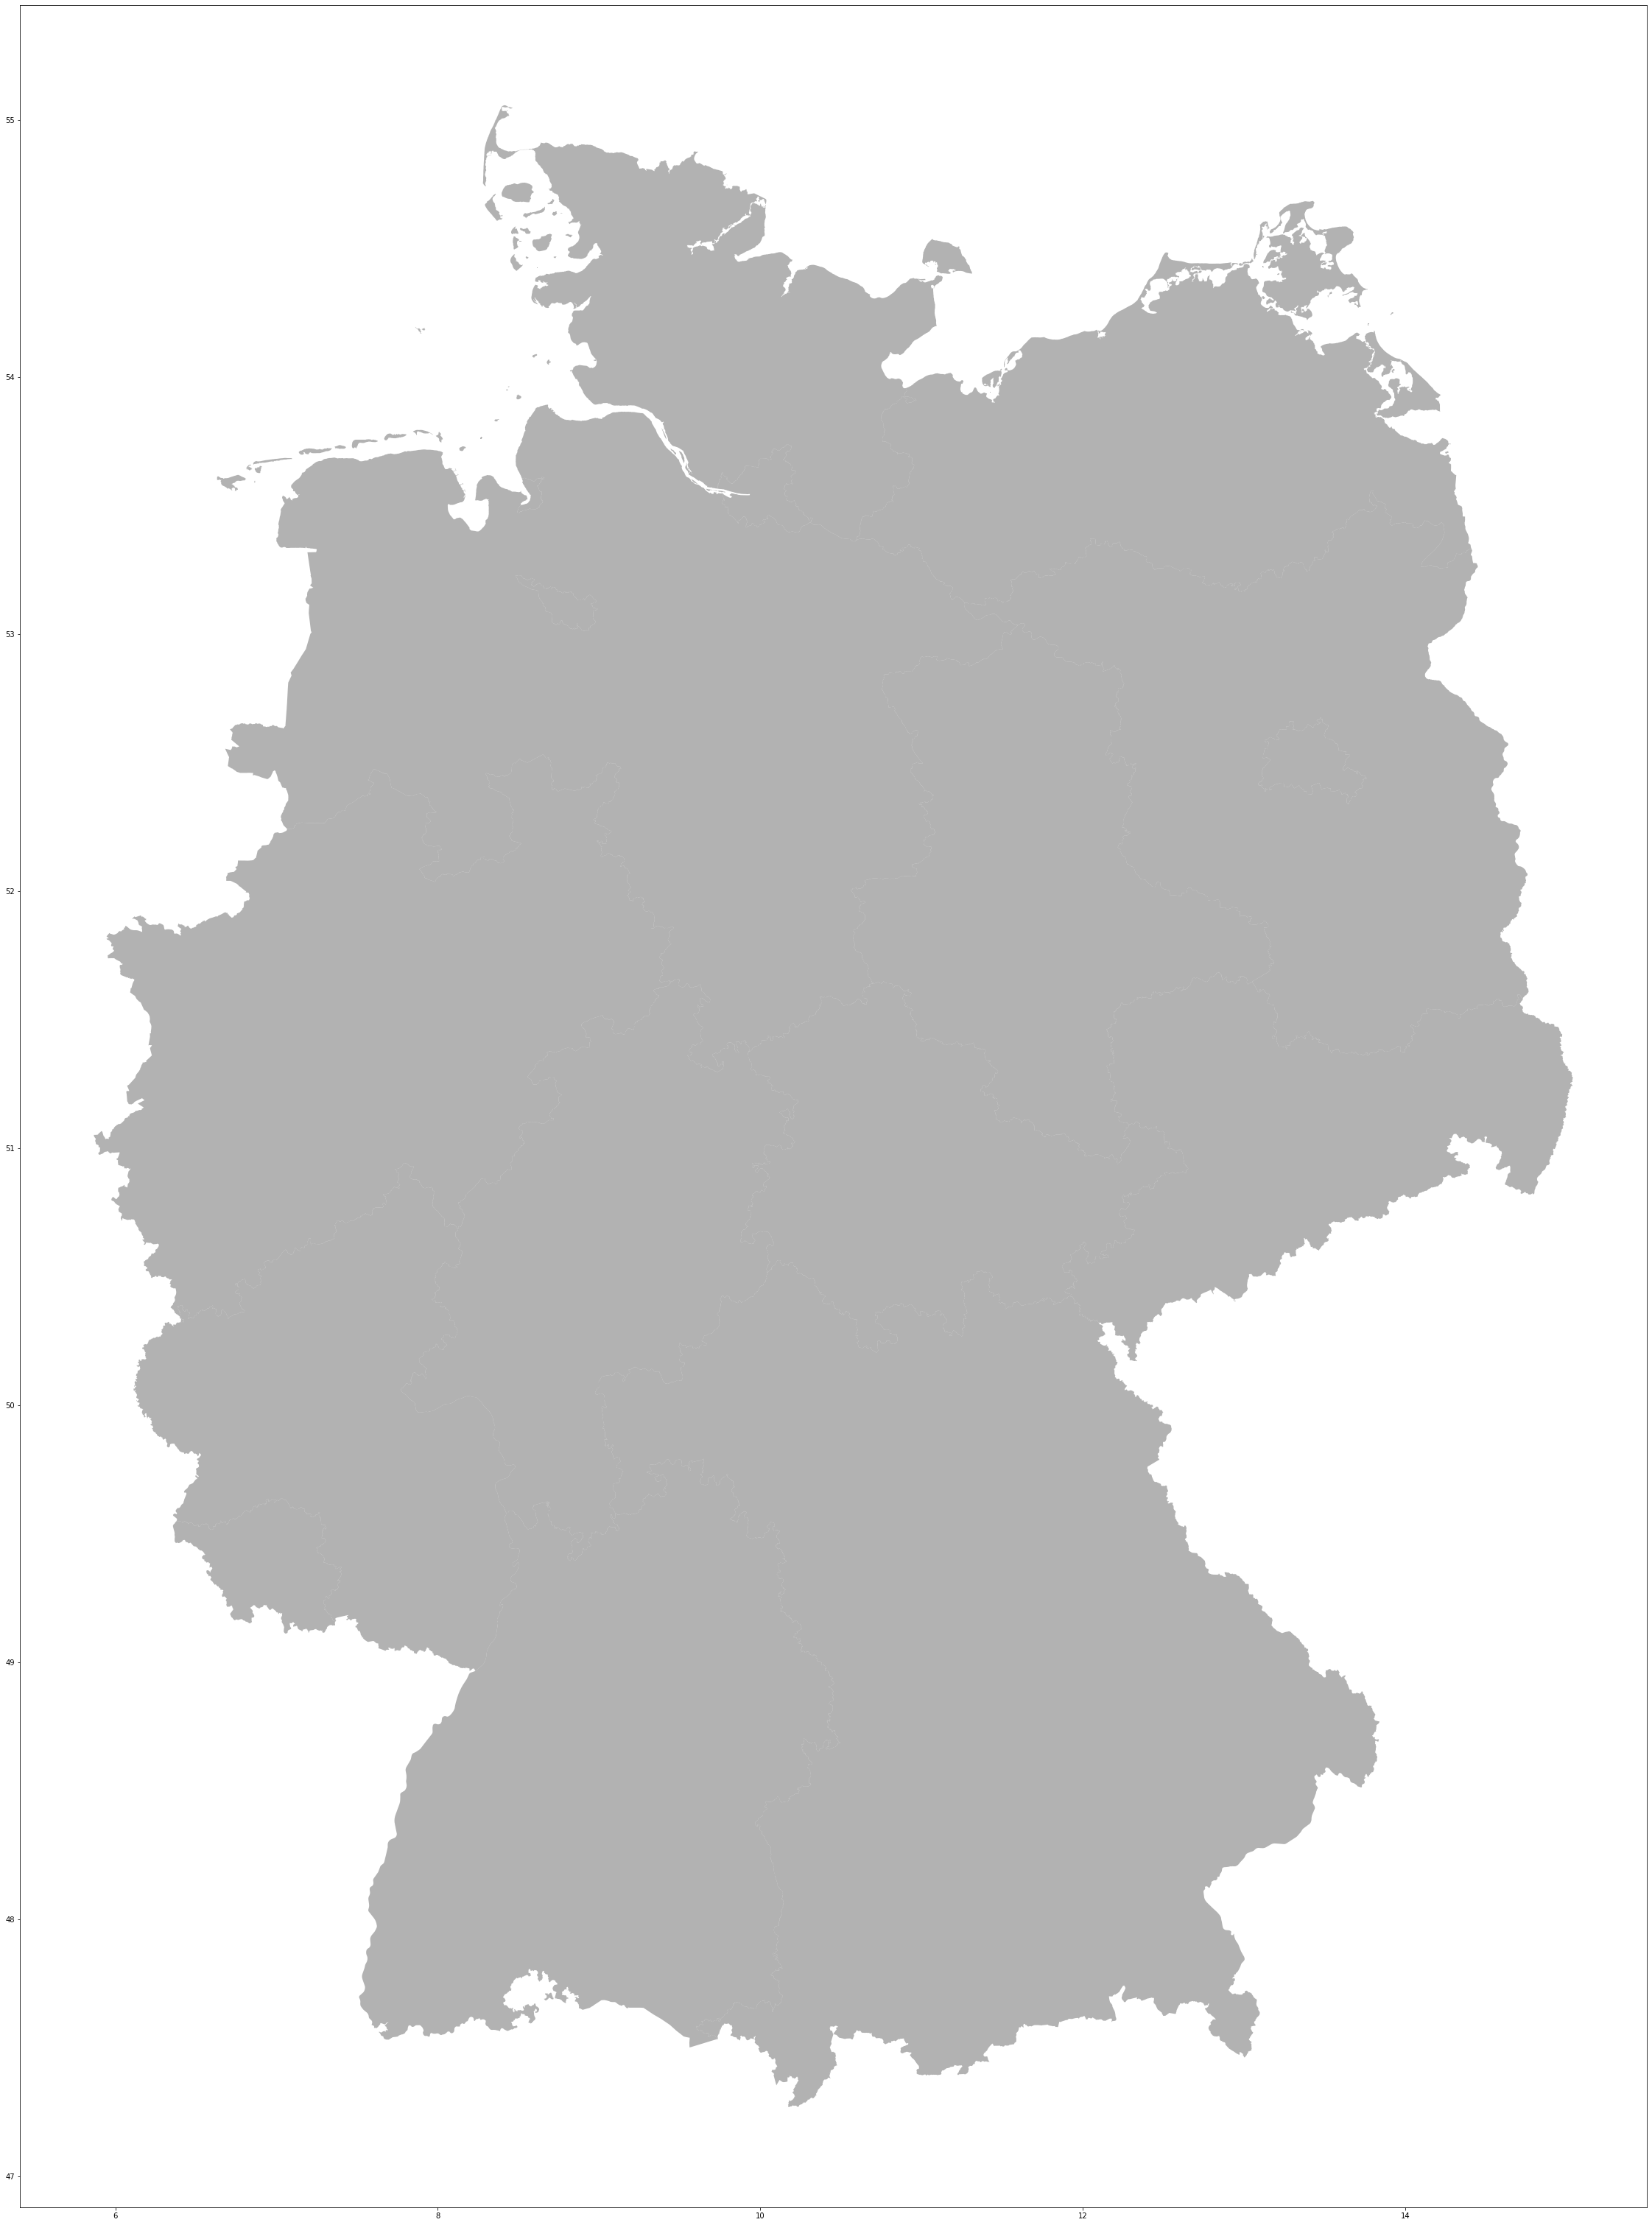

In [4]:
import geopandas as gpd
import matplotlib.pyplot as plt

shapefile = gpd.read_file(m.config.shapefile)
fig, ax = plt.subplots(figsize=m.config.figsize)
shapefile.plot(ax=ax, alpha=0.6, color=m.config.shapefile_color)

We can change the figsize to get a smaller version:

<AxesSubplot:>

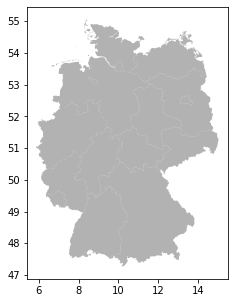

In [5]:
m.config.figsize = (5,5)

fig, ax = plt.subplots(figsize=m.config.figsize)
shapefile.plot(ax=ax, alpha=0.6, color=m.config.shapefile_color)

We can also change the background color:

<AxesSubplot:>

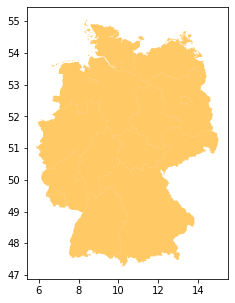

In [6]:
m.config.shapefile_color = "orange"

fig, ax = plt.subplots(figsize=m.config.figsize)
shapefile.plot(ax=ax, alpha=0.6, color=m.config.shapefile_color)

Indeed, we can use other shapefiles as well:

<AxesSubplot:>

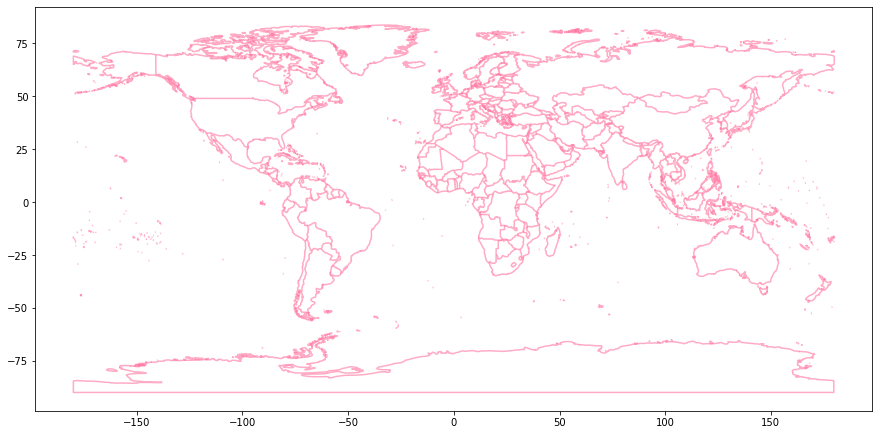

In [7]:
m.config.shapefile = "../data/shapefiles/CNTR_BN_20M_2020_4326.shp/CNTR_BN_20M_2020_4326.shp"
m.config.figsize = (15,15)
m.config.shapefile_color = "#ff74a0"

shapefile = gpd.read_file(m.config.shapefile)
fig, ax = plt.subplots(figsize=m.config.figsize)
shapefile.plot(ax=ax, alpha=0.6, color=m.config.shapefile_color)

-----

## Geo coordinates

In order to plot cities on a map (provided by our shapefile, see above) we need the coordinates of them in a CSV file. We can then set the configuration parameter _coordinates_ to point to this file.

Please note that the appropriate CSV separator has to be defined in _coordinates_sep_, otherwise the CSV file will not be imported correctly.

In [8]:
import pandas as pd

# wrong CSV separator
m.config.coordinates_sep = "\t"
df = pd.read_csv(m.config.coordinates, sep=m.config.coordinates_sep)
df.head()

city,lat,lng,country,iso2,admin_name,capital,population,population_proper
0  Berlin,52.5167,13.3833,Germany,DE,Berlin,prima...                       
1  Hamburg,53.5500,10.0000,Germany,DE,Hamburg,adm...                       
2  München,48.1372,11.5755,Germany,DE,Bavaria,adm...                       
3  Köln,50.9422,6.9578,Germany,DE,North Rhine-Wes...                       
4  Frankfurt,50.1136,8.6797,Germany,DE,Hesse,mino...

In [9]:
# correct CSV separator
m.config.coordinates_sep = ","
df = pd.read_csv(m.config.coordinates, sep=m.config.coordinates_sep)
df.head()

city      lat      lng  country iso2              admin_name  capital  \
0     Berlin  52.5167  13.3833  Germany   DE                  Berlin  primary   
1    Hamburg  53.5500  10.0000  Germany   DE                 Hamburg    admin   
2    München  48.1372  11.5755  Germany   DE                 Bavaria    admin   
3       Köln  50.9422   6.9578  Germany   DE  North Rhine-Westphalia      NaN   
4  Frankfurt  50.1136   8.6797  Germany   DE                   Hesse    minor   

   population  population_proper  
0   3644826.0          3644826.0  
1   1841179.0          1841179.0  
2   1471508.0          1471508.0  
3   1085664.0          1085664.0  
4    753056.0           753056.0

The configuation parameter _keys_labels_ defines the column which will be used to identify nodes in our graph and the column with node labels. We want to plot cities on a map, so we use the column named "id" as identifier and the column names "city" for our labels. If identifier and node label are the same, both values in _keys_labels_ may be the same, however.

In [10]:
m.config.keys_labels = ("id", "city")

In [11]:
# this column will be used for node labels
df[m.config.keys_labels[1]]

0                      Berlin
1                     Hamburg
2                     München
3                        Köln
4                   Frankfurt
                ...          
602                    Köthen
603                 Rotenburg
604                 Karlstadt
605                   Homberg
606    Garmisch-Partenkirchen
Name: city, Length: 607, dtype: object

The columns with longitude/latitude information in the _coordinates_ file must be named "lat" and "lng", respectively. See the example coordinates CSV file:

In [12]:
df.head()

city      lat      lng  country iso2              admin_name  capital  \
0     Berlin  52.5167  13.3833  Germany   DE                  Berlin  primary   
1    Hamburg  53.5500  10.0000  Germany   DE                 Hamburg    admin   
2    München  48.1372  11.5755  Germany   DE                 Bavaria    admin   
3       Köln  50.9422   6.9578  Germany   DE  North Rhine-Westphalia      NaN   
4  Frankfurt  50.1136   8.6797  Germany   DE                   Hesse    minor   

   population  population_proper  
0   3644826.0          3644826.0  
1   1841179.0          1841179.0  
2   1471508.0          1471508.0  
3   1085664.0          1085664.0  
4    753056.0           753056.0

-----

## Starting the visualization

Start the visualization by setting the appropriate configuration parameters and calling the _start()_ function on the _Map_ object:

In [13]:
m = Map()
m.set_config(graphml="../data/examples/demo.graphml",
             o="../data/output/map_img/",
             degrees="../data/output/degrees/",
             types=["scatter", "cities", "degrees", "map"],  # visualize all availabe types
             all_nodes=False,
             keys_labels=("city", "city"),
             map_extent=[5.5, 15.5, 47.2, 55.3],  # Germany
             log="../data/logs/map_example.out",
             name="demo",
             figsize=(30,30))
m.start()

If you want to see the output images directly on screen, set _verbose_ to True and reduce the _figsize_ parameter:

2021-09-02 09:42:26.418 | INFO     | bibliometa.graph.visualization:start:59 - Start network creation.
2021-09-02 09:42:28.087 | INFO     | bibliometa.graph.visualization:convert_to_gdf:314 - Successfully converted import data from ../data/german_cities.csv to GeoDataFrame.
2021-09-02 09:42:28.274 | INFO     | bibliometa.graph.utils:load_graph:49 - Import from .graphml file ../data/examples/demo.graphml.
2021-09-02 09:42:28.376 | INFO     | bibliometa.graph.utils:load_graph:51 - Import finished.
2021-09-02 09:42:28.406 | INFO     | bibliometa.graph.visualization:start:65 - Creating scatterplot.


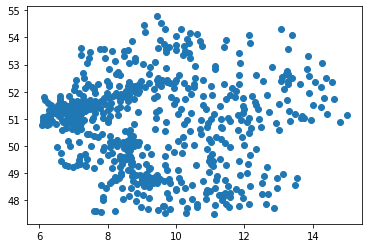

2021-09-02 09:42:32.823 | INFO     | bibliometa.graph.visualization:start:70 - Plotting all cities.


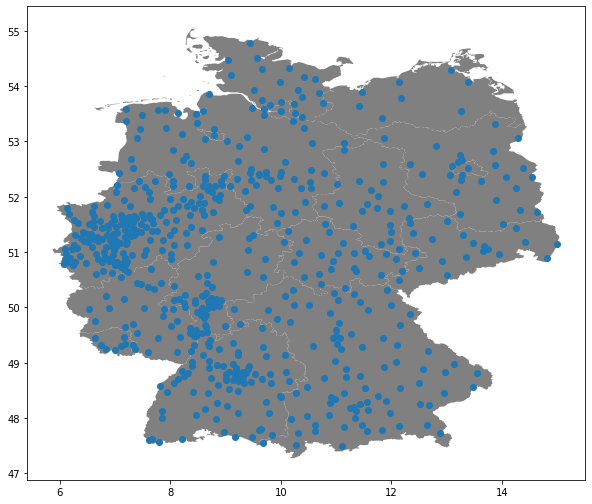

2021-09-02 09:42:38.920 | INFO     | bibliometa.graph.visualization:start:75 - Plotting node degrees.


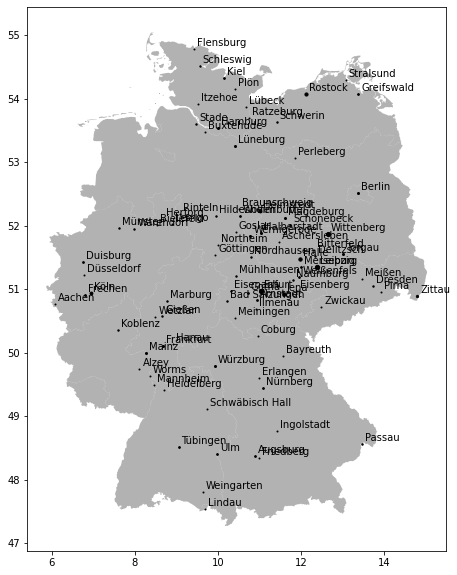

2021-09-02 09:45:37.118 | INFO     | bibliometa.graph.visualization:start:90 - Plotting network on map.


{'Mühlhausen': (10.45, 51.2167), 'Northeim': (10.0011, 51.7067), 'Erfurt': (11.0328, 50.9787), 'Berlin': (13.3833, 52.5167), 'Arnstadt': (10.9464, 50.8342), 'Naumburg': (11.8098, 51.1521), 'Jena': (11.5864, 50.9272), 'Helmstedt': (11.0106, 52.2281), 'Passau': (13.4667, 48.5667), 'Braunschweig': (10.5211, 52.2692), 'Lemgo': (8.9043, 52.0277), 'Lüneburg': (10.4144, 53.2525), 'Wittenberg': (12.6484, 51.8671), 'Halberstadt': (11.0467, 51.8958), 'Köln': (6.9578, 50.9422), 'Aachen': (6.0838, 50.7762), 'Weingarten': (9.6417, 47.8078), 'Koblenz': (7.5978, 50.3597), 'Hildesheim': (9.95, 52.15), 'Leipzig': (12.3833, 51.35), 'Lindau': (9.6839, 47.5458), 'Lübeck': (10.6864, 53.8697), 'Alzey': (8.1161, 49.7517), 'Halle': (11.9697, 51.4828), 'Wolfenbüttel': (10.5369, 52.1622), 'Magdeburg': (11.6292, 52.1278), 'Eisenach': (10.3244, 50.9747), 'Schleswig': (9.5697, 54.5153), 'Kiel': (10.1394, 54.3233), 'Rostock': (12.1333, 54.0833), 'Münster': (7.6256, 51.9625), 'Warendorf': (7.9933, 51.9539), 'Gotha':

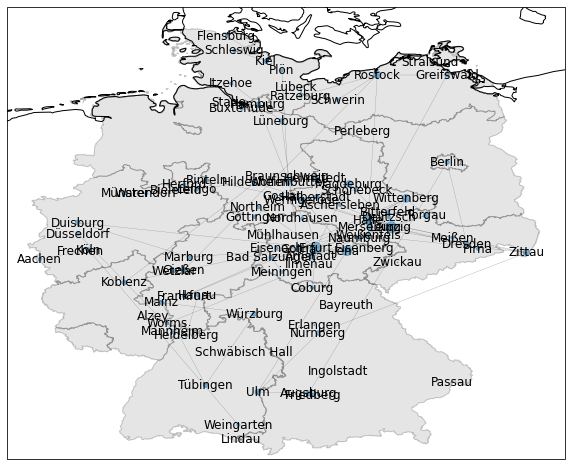

2021-09-02 09:47:06.467 | INFO     | bibliometa.graph.visualization:start:109 - Network creation finished.
2021-09-02 09:47:06.490 | INFO     | bibliometa.graph.visualization:start:110 - Logfile written to ../data/logs/map_example_small.out


In [14]:
# we create a new Map object to not overwrite the existing files
m2 = Map()
m2.set_config(graphml="../data/examples/demo.graphml",
              o="../data/output/map_img/small/",
              degrees="../data/output/degrees/",
              types=["scatter", "cities", "degrees", "map"],
              all_nodes=False,
              keys_labels=("city", "city"),
              map_extent=[5.5, 15.5, 47.2, 55.3],
              log="../data/logs/map_example_small.out",
              name="demo",
              verbose=True,
              figsize=(10,10))
m2.start()

If we are, for example, only interested in the node degree and map visualization, we can set the _types_ parameter accordingly. We also change---just for illustration purposes---the font and edge size:

2021-09-02 09:47:06.975 | INFO     | bibliometa.graph.visualization:start:59 - Start network creation.
2021-09-02 09:47:12.248 | INFO     | bibliometa.graph.visualization:convert_to_gdf:314 - Successfully converted import data from ../data/german_cities.csv to GeoDataFrame.
2021-09-02 09:47:12.509 | INFO     | bibliometa.graph.utils:load_graph:49 - Import from .graphml file ../data/examples/demo.graphml.
2021-09-02 09:47:12.616 | INFO     | bibliometa.graph.utils:load_graph:51 - Import finished.
2021-09-02 09:47:12.647 | INFO     | bibliometa.graph.visualization:start:75 - Plotting node degrees.


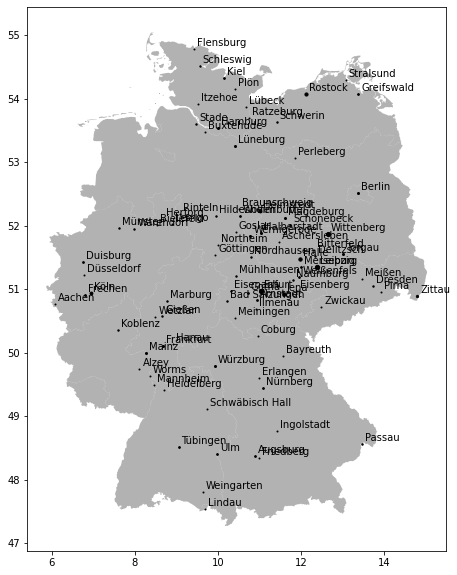

2021-09-02 09:47:59.972 | INFO     | bibliometa.graph.visualization:start:90 - Plotting network on map.


{'Mühlhausen': (10.45, 51.2167), 'Northeim': (10.0011, 51.7067), 'Erfurt': (11.0328, 50.9787), 'Berlin': (13.3833, 52.5167), 'Arnstadt': (10.9464, 50.8342), 'Naumburg': (11.8098, 51.1521), 'Jena': (11.5864, 50.9272), 'Helmstedt': (11.0106, 52.2281), 'Passau': (13.4667, 48.5667), 'Braunschweig': (10.5211, 52.2692), 'Lemgo': (8.9043, 52.0277), 'Lüneburg': (10.4144, 53.2525), 'Wittenberg': (12.6484, 51.8671), 'Halberstadt': (11.0467, 51.8958), 'Köln': (6.9578, 50.9422), 'Aachen': (6.0838, 50.7762), 'Weingarten': (9.6417, 47.8078), 'Koblenz': (7.5978, 50.3597), 'Hildesheim': (9.95, 52.15), 'Leipzig': (12.3833, 51.35), 'Lindau': (9.6839, 47.5458), 'Lübeck': (10.6864, 53.8697), 'Alzey': (8.1161, 49.7517), 'Halle': (11.9697, 51.4828), 'Wolfenbüttel': (10.5369, 52.1622), 'Magdeburg': (11.6292, 52.1278), 'Eisenach': (10.3244, 50.9747), 'Schleswig': (9.5697, 54.5153), 'Kiel': (10.1394, 54.3233), 'Rostock': (12.1333, 54.0833), 'Münster': (7.6256, 51.9625), 'Warendorf': (7.9933, 51.9539), 'Gotha':

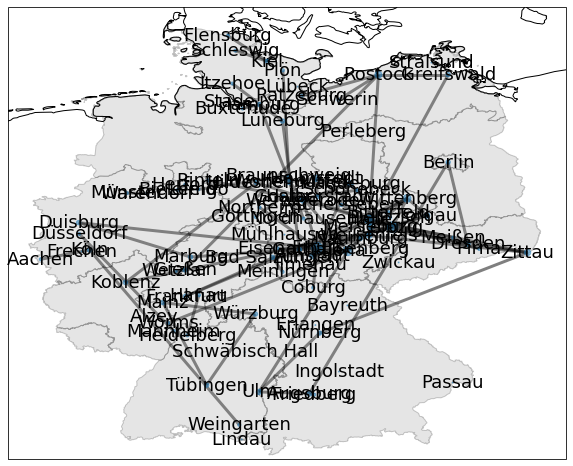

2021-09-02 09:48:16.645 | INFO     | bibliometa.graph.visualization:start:109 - Network creation finished.
2021-09-02 09:48:16.659 | INFO     | bibliometa.graph.visualization:start:110 - Logfile written to ../data/logs/map_example_small.out


In [15]:
m3 = Map()
m3.set_config(graphml="../data/examples/demo.graphml",
              o="../data/output/map_img/small/",
              degrees="../data/output/degrees/",
              types=["degrees", "map"],  # new
              all_nodes=False,
              keys_labels=("city", "city"),
              map_extent=[5.5, 15.5, 47.2, 55.3],              
              log="../data/logs/map_example_small.out",
              name="demo",
              verbose=True,
              figsize=(10,10),
              fontsize=18,  # new
              max_fontsize=32,  # new
              edge_width=3.0  # new
             )
m3.start()

Now let's use all nodes (parameter _all_nodes_ == True), also those with no edges at all, in creating the network visualization. (For example, "Bremen" becomes now visible on the map).

2021-09-02 09:48:16.777 | INFO     | bibliometa.graph.visualization:start:59 - Start network creation.
2021-09-02 09:48:17.879 | INFO     | bibliometa.graph.visualization:convert_to_gdf:314 - Successfully converted import data from ../data/german_cities.csv to GeoDataFrame.
2021-09-02 09:48:18.004 | INFO     | bibliometa.graph.utils:load_graph:49 - Import from .graphml file ../data/examples/demo.graphml.
2021-09-02 09:48:18.064 | INFO     | bibliometa.graph.utils:load_graph:51 - Import finished.
2021-09-02 09:48:18.202 | INFO     | bibliometa.graph.visualization:start:90 - Plotting network on map.


{'Mühlhausen': (10.45, 51.2167), 'Northeim': (10.0011, 51.7067), 'Erfurt': (11.0328, 50.9787), 'Berlin': (13.3833, 52.5167), 'Arnstadt': (10.9464, 50.8342), 'Naumburg': (11.8098, 51.1521), 'Jena': (11.5864, 50.9272), 'Helmstedt': (11.0106, 52.2281), 'Passau': (13.4667, 48.5667), 'Braunschweig': (10.5211, 52.2692), 'Lemgo': (8.9043, 52.0277), 'Lüneburg': (10.4144, 53.2525), 'Wittenberg': (12.6484, 51.8671), 'Halberstadt': (11.0467, 51.8958), 'Köln': (6.9578, 50.9422), 'Aachen': (6.0838, 50.7762), 'Weingarten': (9.6417, 47.8078), 'Koblenz': (7.5978, 50.3597), 'Hildesheim': (9.95, 52.15), 'Leipzig': (12.3833, 51.35), 'Lindau': (9.6839, 47.5458), 'Lübeck': (10.6864, 53.8697), 'Alzey': (8.1161, 49.7517), 'Halle': (11.9697, 51.4828), 'Wolfenbüttel': (10.5369, 52.1622), 'Magdeburg': (11.6292, 52.1278), 'Eisenach': (10.3244, 50.9747), 'Schleswig': (9.5697, 54.5153), 'Kiel': (10.1394, 54.3233), 'Rostock': (12.1333, 54.0833), 'Münster': (7.6256, 51.9625), 'Warendorf': (7.9933, 51.9539), 'Gotha':

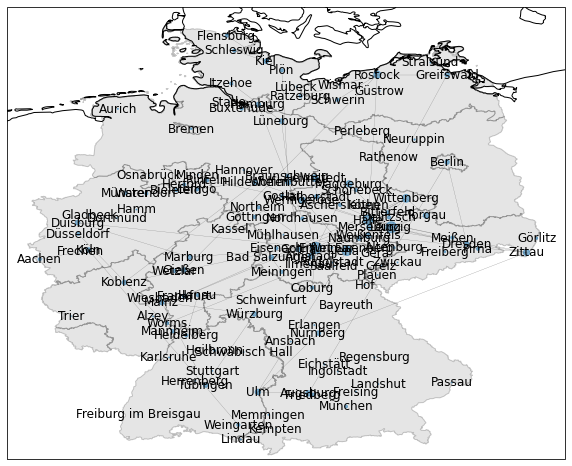

2021-09-02 09:49:05.987 | INFO     | bibliometa.graph.visualization:start:109 - Network creation finished.
2021-09-02 09:49:06.018 | INFO     | bibliometa.graph.visualization:start:110 - Logfile written to ../data/logs/map_example_small.out


In [16]:
m4 = Map()
m4.set_config(graphml="../data/examples/demo.graphml",
              o="../data/output/map_img/small/",
              degrees="../data/output/degrees/",
              types=["map"],
              all_nodes=True,
              graph_corpus="../data/examples/graph_corpus_demo_1700.json",  # this is mandatory when all_nodes == True
              keys_labels=("city", "city"),
              map_extent=[5.5, 15.5, 47.2, 55.3],              
              log="../data/logs/map_example_small.out",
              name="demo",
              verbose=True,
              figsize=(10,10))
m4.start()

And now the same configuration, except that now we use __only__ those nodes with no edges (parameter _singletons_ == True):

2021-09-02 09:49:06.158 | INFO     | bibliometa.graph.visualization:start:59 - Start network creation.
2021-09-02 09:49:07.528 | INFO     | bibliometa.graph.visualization:convert_to_gdf:314 - Successfully converted import data from ../data/german_cities.csv to GeoDataFrame.
2021-09-02 09:49:07.675 | INFO     | bibliometa.graph.utils:load_graph:49 - Import from .graphml file ../data/examples/demo.graphml.
2021-09-02 09:49:07.738 | INFO     | bibliometa.graph.utils:load_graph:51 - Import finished.
2021-09-02 09:49:07.809 | INFO     | bibliometa.graph.visualization:start:90 - Plotting network on map.


{'Görlitz': (14.9872, 51.1528), 'Freiberg': (13.3428, 50.9119), 'Hamm': (7.8167, 51.6667), 'Gladbeck': (6.9827, 51.5713), 'Kassel': (9.4979, 51.3158), 'München': (11.5755, 48.1372), 'Weimar': (11.3167, 50.9833), 'Stuttgart': (9.1775, 48.7761), 'Osnabrück': (8.0431, 52.2789), 'Ansbach': (10.5833, 49.3), 'Neuruppin': (12.8, 52.9222), 'Bremen': (8.7975, 53.1153), 'Karlsruhe': (8.4, 49.0167), 'Köthen': (11.9709, 51.7518), 'Saalfeld': (11.3542, 50.6506), 'Regensburg': (12.0833, 49.0167), 'Trier': (6.6414, 49.7567), 'Gera': (12.0824, 50.8782), 'Greiz': (12.1997, 50.6547), 'Freising': (11.7489, 48.4028), 'Hof': (11.9167, 50.3167), 'Dortmund': (7.4653, 51.5139), 'Aurich': (7.4836, 53.4714), 'Rudolstadt': (11.3275, 50.7169), 'Heilbronn': (9.218, 49.1404), 'Memmingen': (10.1811, 47.9878), 'Kempten': (10.3167, 47.7333), 'Minden': (8.9167, 52.2883), 'Schweinfurt': (10.2333, 50.05), 'Hannover': (9.7386, 52.3744), 'Rathenow': (12.3333, 52.6), 'Landshut': (12.1508, 48.5397), 'Eichstätt': (11.1839, 48

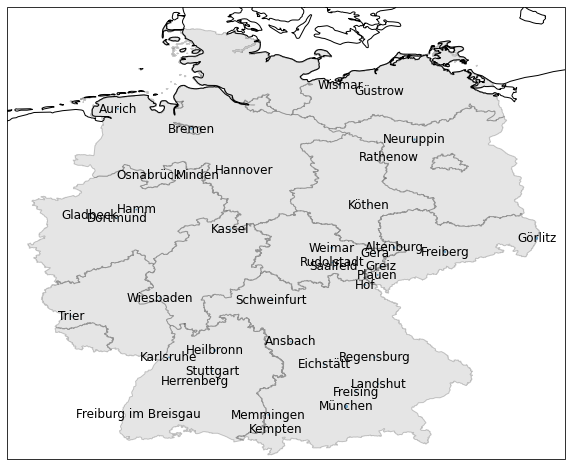

2021-09-02 09:49:26.858 | INFO     | bibliometa.graph.visualization:start:109 - Network creation finished.
2021-09-02 09:49:26.872 | INFO     | bibliometa.graph.visualization:start:110 - Logfile written to ../data/logs/map_example_small.out


In [17]:
m5 = Map()
m5.set_config(graphml="../data/examples/demo.graphml",
              o="../data/output/map_img/small/",
              degrees="../data/output/degrees/",
              types=["map"],
              all_nodes=True,
              singletons=True,
              graph_corpus="../data/examples/graph_corpus_demo_1700.json",  # this is mandatory when all_nodes == True
              keys_labels=("city", "city"),
              map_extent=[5.5, 15.5, 47.2, 55.3],              
              log="../data/logs/map_example_small.out",
              name="demo",
              verbose=True,
              figsize=(10,10))
m5.start()

As you can see, no edges are in the visualization.

-----

## Output files

Let's have a look at the output files produced:

In [18]:
# log file
with open(m.config.log, "r", encoding=m.config.encoding) as f:
    log_text = f.read().splitlines()
    
log_text[:20]

['2021-09-01T16:28:57.460803+0200 INFO Start network creation.',
 '2021-09-01T16:28:57.950981+0200 INFO Successfully converted import data from ../data/german_cities.csv to GeoDataFrame.',
 '2021-09-01T16:28:57.956006+0200 DEBUG Imported city data:',
 '        city      lat      lng  country iso2              admin_name  capital  \\',
 '0     Berlin  52.5167  13.3833  Germany   DE                  Berlin  primary   ',
 '1    Hamburg  53.5500  10.0000  Germany   DE                 Hamburg    admin   ',
 '2    München  48.1372  11.5755  Germany   DE                 Bavaria    admin   ',
 '3       Köln  50.9422   6.9578  Germany   DE  North Rhine-Westphalia      NaN   ',
 '4  Frankfurt  50.1136   8.6797  Germany   DE                   Hesse    minor   ',
 '',
 '   population  population_proper  ',
 '0   3644826.0          3644826.0  ',
 '1   1841179.0          1841179.0  ',
 '2   1471508.0          1471508.0  ',
 '3   1085664.0          1085664.0  ',
 '4    753056.0           753056.0  ',

In [19]:
# output image folder
import os

os.listdir(m.config.o)

['small', 'cities', 'network', 'degrees', 'scatter']

In [20]:
# output folder with degree information
os.listdir(m.config.degrees)

['degrees_demo.json']

The JSON files with degree information for each node look as follows:

In [21]:
import json

with open(m.config.degrees + "degrees_demo.json", "r", encoding=m.config.encoding) as f:
    d = json.load(f)

for i in list(d.items())[:10]:
    print(i)

('Leipzig', 19)
('Erfurt', 17)
('Wittenberg', 17)
('Jena', 11)
('Halle', 11)
('Königsberg', 10)
('Amsterdam', 10)
('Paris', 10)
('Rostock', 10)
('Helmstedt', 8)


It seems like everything went as expected.

Finally, let's see the representation of our data as network on a map (which is the visualization with the most information in it):

In [22]:
from IPython.display import SVG, display

with open(m.config.o + "network/" + m.config.name + ".svg", "r", encoding=m.config.encoding) as f:
    data = f.read()
    
display(SVG(data))

Node sizes indicate node degrees. Two nodes are connected by an edge if they are similar. (What counts as "similar" is defined by the similarity function used to generate the similarity file on which the GraphML file used for visualization is based; see tutorial "02 - json2edgelist" for further information about similarity functions).

-----

## Iterating over multiple files

In [23]:
m = Map()

for root, dirs, files in os.walk(os.path.dirname("../data/examples/multiple_graphml/")):
    for file in files:
        filename = os.path.splitext(file)[0]
        m.set_config(graphml=root + os.sep + file,
                     o="../data/output/map_img/multiple/",
                     degrees="../data/output/degrees/multiple/",
                     types=["scatter", "cities", "degrees", "map"],
                     all_nodes=False,
                     keys_labels=("city", "city"),
                     map_extent=[5.5, 15.5, 47.2, 55.3],  # Germany
                     log=f"../data/logs/map_{filename}.out",
                     name=filename.split(".")[0],
                     figsize=(30,30)
                    ).start()

-----